In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_1 = -2 + np.random.randn(100, 1)
X_2 = 2 + np.random.randn(100, 1)
y_1 = -1 + np.random.randn(100, 1)
y_2 = 2 + np.random.randn(100, 1)

In [3]:
X_1 = np.c_[X_1, y_1]
X_2 = np.c_[X_2, y_2]
X = np.concatenate((X_1, X_2), axis=0)
X_b = np.c_[np.ones((200, 1)), X] # сгенерируем данные (линейно сепарабельные)
y = np.concatenate((-np.ones((100, 1)), np.ones((100, 1))), axis=0) # таргеты данных
X.shape, y.shape

((200, 2), (200, 1))

In [4]:
weights = np.zeros((3, 1)) # изначально установим веса в 0

y_test: [[-7.43993166]
 [ 9.95623338]]


(-6.0, 6.0, -6.0, 6.0)

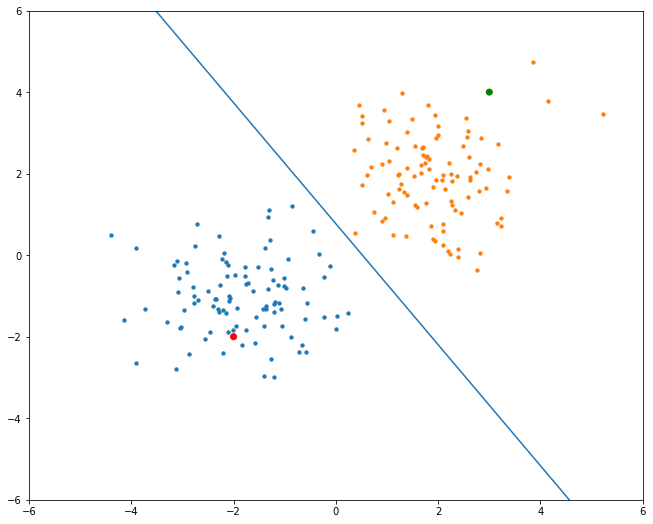

In [5]:
plt.figure(figsize=(11, 9))
plt.scatter(X[:100, 0], X[:100, 1], s=11)
plt.scatter(X[100:, 0], X[100:, 1], s=11)


X_line = np.linspace(-5, 5, 100).reshape((-1, 1))
X_b_line = np.c_[np.ones((100, 1)), X_line]
epoch = 0
while True: # начало алгоритма внешний цикл
    m = 0 # счётчик ошибок
    epoch += 1
    for point, t in zip(X_b, y): # проходим по всем точкам множества
        if t * point.dot(weights) <= 0:
            """Произведение X_b на вектор весов W даст нам числовое значение,
            которое показывает, где будет наша точка: выше или ниже 
            разделительной гиперплоскости.
            Изначально, y = {-1, 1}
            Соответсвенно, если знак таргета и взвешенной суммы - совпадает,
            то предсказание правильное и ничего делать не нужно, иначе 
            требуется изменить веса
            """
            weights += t * point.reshape((-1, 1)) # изменяем веса
            m += 1 # увеличиваем счётчик ошибок
    y_line = -(X_b_line[:, 1] * weights[1,0] + weights[0,0]) / weights[2,0]    
    if m == 0: # Если после пробега по всем точкам ошибок - нет, алгоритм сработал успешно т.е. выходим
        break
plt.plot(X_line, y_line) # чертим разделяющую гиперплоскость

X_test = np.array([[1, -2, -2], [1, 3, 4]])
y_test = X_test.dot(weights)
print("y_test: {}".format(y_test))
plt.scatter(X_test[:, 1], X_test[:, 2], color=['r', 'g'])
plt.axis([-6, 6, -6, 6])


In [6]:
print(weights)

[[-1.        ]
 [ 1.92362994]
 [ 1.29633589]]


In [7]:
from sklearn import datasets

In [8]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [9]:
X_zeros_sevens = X[(y == 7) | (y == 0)]
X_zeros_sevens_b = np.c_[np.ones((357, 1)),X[(y == 7) | (y == 0)]]
y_zeros_sevens = y[(y == 7) | (y == 0)]
y_zeros_sevens[y_zeros_sevens == 7] = 1
y_zeros_sevens[y_zeros_sevens == 0] = -1
X_zeros_sevens.shape

(357, 64)

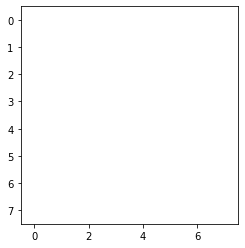

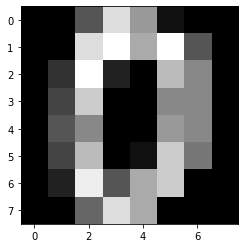

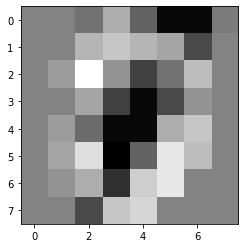

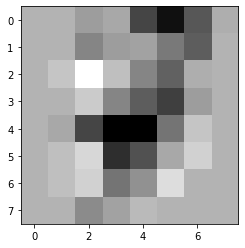

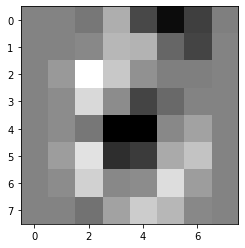

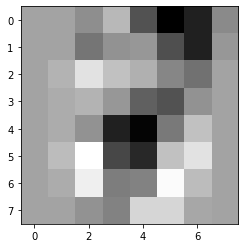

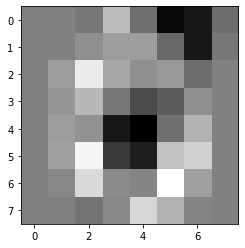

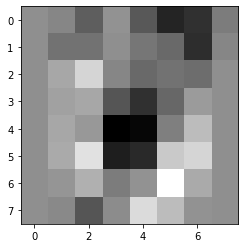

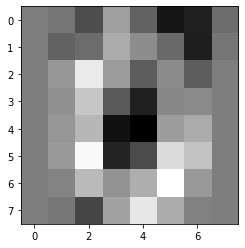

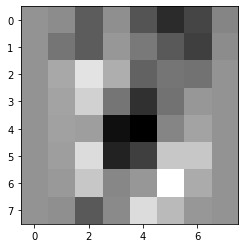

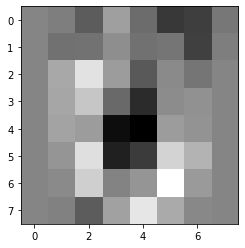

<function matplotlib.pyplot.show(*args, **kw)>

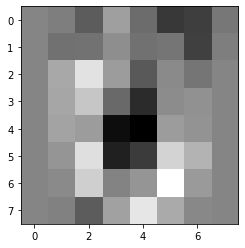

In [10]:
w = np.zeros((65, 1))
epochs = 0
plt.imshow(w[1:].reshape(8, 8), cmap='binary')
plt.show()
while True:
    m = 0
    epochs += 1
    for digit, t in zip(X_zeros_sevens_b, y_zeros_sevens):
        if t * digit.dot(w) <= 0:
            w += t * digit.reshape((-1, 1))
            m += 1
            plt.imshow(w[1:].reshape(8, 8), cmap='binary')
            plt.show()
    if m == 0:
        break
plt.imshow(w[1:].reshape(8, 8), cmap='binary')
plt.show

[1.]

1


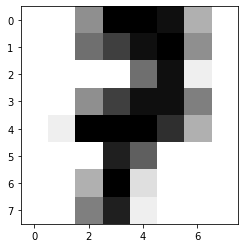

[1.]

1


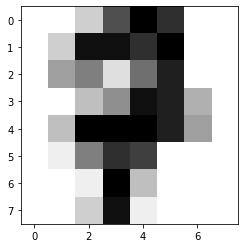

[1.]

1


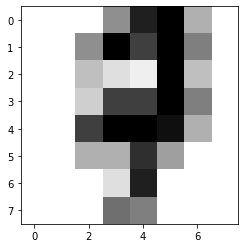

[-1.]

-1


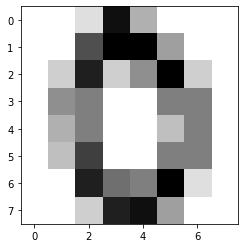

[-1.]

-1


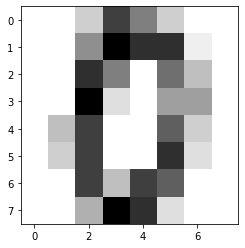

[1.]

1


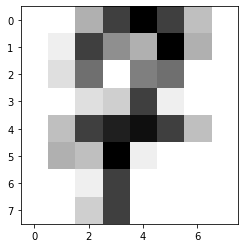

[1.]

1


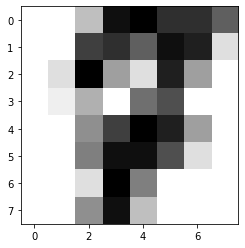

[1.]

1


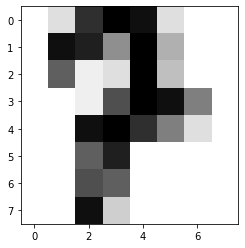

[-1.]

-1


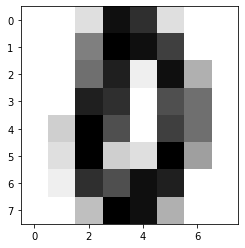

[-1.]

-1


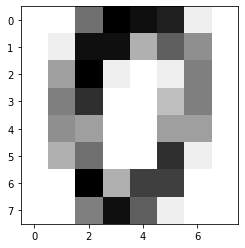

In [19]:
for _ in range(10):
    rnd_indices = np.random.randint(0, 357)
    print(np.sign(X_zeros_sevens_b[rnd_indices].dot(w)).flatten())
    print()
    print(y_zeros_sevens[rnd_indices])
    plt.imshow(X_zeros_sevens[rnd_indices].reshape(8,8), cmap='binary')
    plt.show()
